In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
from collections import Counter
from scipy.stats import mannwhitneyu

# Objective
This notebook plots the violin plots for the max area in both an aggregate and seasonal (somewhat subjective sense) for the updated and final ARs

In [2]:
#bring in the data we need
non_mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_Non_MJO_ARs.csv')
non_mjo_og = non_mjo_og.drop(columns=['Unnamed: 0'])

mjo_act_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Active_ARs.csv')
mjo_act_og = mjo_act_og.drop(columns=['Unnamed: 0'])
mjo_og = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/text_files/ERM_3day_MJO_Connected_ARs.csv')
mjo_og = mjo_og.drop(columns=['Unnamed: 0'])

In [9]:
xr.open_dataset(mjo_og['AR ID (string)'].iloc[0])

<xarray.Dataset>
Dimensions:                       (lat: 721, lon: 1440, time: 413, n: 1)
Coordinates:
  * n                             (n) int32 1
  * time                          (time) datetime64[ns] 2000-07-10T19:00:00 ....
  * lon                           (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
  * lat                           (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
Data variables: (12/21)
    grid_area                     (lat, lon) float32 ...
    centroid_lon                  (time) float64 ...
    centroid_lat                  (time) float64 ...
    area                          (time) float64 ...
    largest_object_centroid_lon   (time) float64 ...
    largest_object_centroid_lat   (time) float64 ...
    ...                            ...
    lptid                         (n) float64 ...
    duration                      (n) float64 ...
    maxarea                       (n) float64 ...
    zonal_propagation_speed       (n) float64 ...
    meridional_propagation_speed  (n) float64 ...
    mask                          (time, lat, lon) int8 ...

## Overall

In [10]:
non_mjo_erm = []
for i in range(0,len(non_mjo_og)):
    ar_test = xr.open_dataset(non_mjo_og['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    non_mjo_erm += [area]

non_mjo_erm = np.array(non_mjo_erm)
non_mjo_erm = np.concatenate(non_mjo_erm)

In [11]:
mjo_act_erm = []
for i in range(0,len(mjo_act_og)):
    ar_test = xr.open_dataset(mjo_act_og['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    mjo_act_erm += [area]

mjo_act_erm = np.array(mjo_act_erm)
mjo_act_erm = np.concatenate(mjo_act_erm)

In [12]:
mjo_erm = []
for i in range(0,len(mjo_og)):
    ar_test = xr.open_dataset(mjo_og['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    mjo_erm += [area]

mjo_erm = np.array(mjo_erm)
mjo_erm = np.concatenate(mjo_erm)

In [13]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

168.00320512820514
555.0
48.0
147.5


In [14]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

178.3793103448276
658.0
48.0
168.0


In [15]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

190.36186770428014
701.0
48.0
180.0


In [16]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

312
580
257


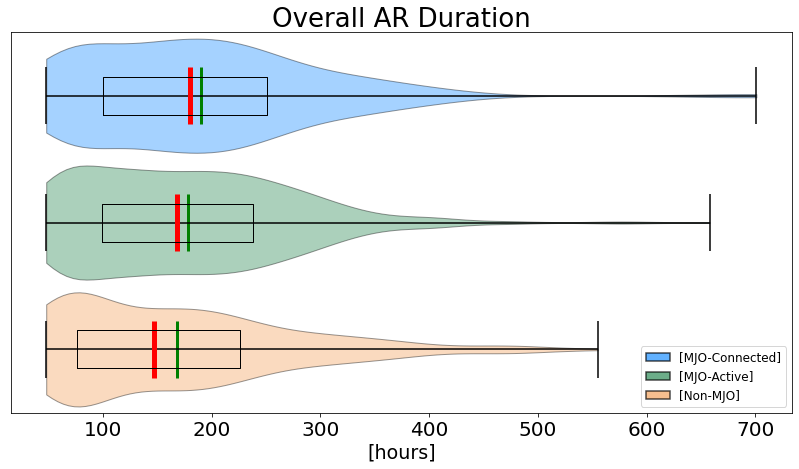

In [17]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Overall AR Duration', fontsize=titlesize)
ax.set_xlabel('[hours]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Max_Area/Overall_Dur.png", dpi=350, bbox_inches='tight')
plt.show()

In [18]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

1.470217041643282e-13
3.4232758212734927e-15
2.536824916798963e-11


In [19]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

#both MJO impacted cases are longer, but not different than each other

0.02118856346850088
0.2008910391597999
0.0028831945115756047
0.01059428173425044
0.10044551957989994
0.0014415972557878024


## DJFM

In [31]:
#mjo not active

dec=non_mjo_og[non_mjo_og['Month'] == 12]
jan=non_mjo_og[non_mjo_og['Month'] == 1]
feb=non_mjo_og[non_mjo_og['Month'] == 2]
mar=non_mjo_og[non_mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

non_mjo_erm = []
for i in range(0,len(CA_non_DJF)):
    ar_test = xr.open_dataset(CA_non_DJF['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    non_mjo_erm += [area]

non_mjo_erm = np.array(non_mjo_erm)
non_mjo_erm = np.concatenate(non_mjo_erm)

In [32]:
#mjo active

dec=mjo_act_og[mjo_act_og['Month'] == 12]
jan=mjo_act_og[mjo_act_og['Month'] == 1]
feb=mjo_act_og[mjo_act_og['Month'] == 2]
mar=mjo_act_og[mjo_act_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_act_erm = []
for i in range(0,len(CA_non_DJF)):
    ar_test = xr.open_dataset(CA_non_DJF['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    mjo_act_erm += [area]

mjo_act_erm = np.array(mjo_act_erm)
mjo_act_erm = np.concatenate(mjo_act_erm)

In [33]:
#mjo connected
dec=mjo_og[mjo_og['Month'] == 12]
jan=mjo_og[mjo_og['Month'] == 1]
feb=mjo_og[mjo_og['Month'] == 2]
mar=mjo_og[mjo_og['Month'] == 3]

CA_non_DJF=pd.concat([dec, jan, feb, mar], ignore_index=True)

mjo_erm = []
for i in range(0,len(CA_non_DJF)):
    ar_test = xr.open_dataset(CA_non_DJF['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    mjo_erm += [area]

mjo_erm = np.array(mjo_erm)
mjo_erm = np.concatenate(mjo_erm)

In [34]:
print(non_mjo_erm.mean())
print(non_mjo_erm.max())
print(non_mjo_erm.min())
print(np.median(non_mjo_erm))

147.95238095238096
383.0
53.0
138.0


In [35]:
print(mjo_act_erm.mean())
print(mjo_act_erm.max())
print(mjo_act_erm.min())
print(np.median(mjo_act_erm))

169.92698412698414
469.0
48.0
167.0


In [36]:
print(mjo_erm.mean())
print(mjo_erm.max())
print(mjo_erm.min())
print(np.median(mjo_erm))

187.62857142857143
425.0
50.0
192.0


In [37]:
print(len(non_mjo_erm))
print(len(mjo_act_erm))
print(len(mjo_erm))

42
315
105


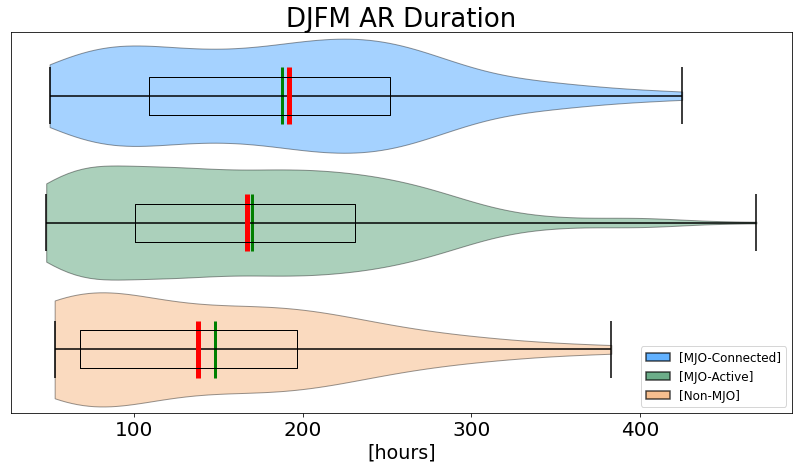

In [38]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_mjo_erm,mjo_act_erm,mjo_erm]
type_labels = ['[Non-MJO]', '[MJO-Active]','[MJO-Connected]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('DJFM AR Duration', fontsize=titlesize)
ax.set_xlabel('[hours]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Max_Area/DJFM_Dur.png", dpi=350, bbox_inches='tight')
plt.show()

In [39]:
from scipy.stats import shapiro
stat, p_value = shapiro(non_mjo_erm)
print(p_value)
stat, p_value = shapiro(mjo_act_erm)
print(p_value)
stat, p_value = shapiro(mjo_erm)
print(p_value)

#not on normal distribution

0.002615606877952814
3.868454001576538e-08
0.005542314145714045


In [40]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='two-sided')
print(p_value)


#applying descending comparisons
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_act_erm, alternative='less')
print(p_value)
stat, p_value = mannwhitneyu(mjo_act_erm, mjo_erm, alternative='less')
print(p_value)
# stat, p_value = mannwhitneyu(mjo_erm, non_start_ivt, alternative='greater')
# print(p_value)
stat, p_value = mannwhitneyu(non_mjo_erm, mjo_erm, alternative='less')
print(p_value)

#mostly all different from each other

0.09433640416869526
0.06342193998090735
0.007797449279949017
0.04716820208434763
0.031710969990453676
0.0038987246399745084


## Overall Seasons

In [71]:
all_ivt = pd.concat([non_mjo_og,mjo_act_og,mjo_og], ignore_index=True)

jan = all_ivt[all_ivt['Month'] == 1]
feb= all_ivt[all_ivt['Month'] == 2]
mar= all_ivt[all_ivt['Month'] == 3]
apr= all_ivt[all_ivt['Month'] == 4]
may= all_ivt[all_ivt['Month'] == 5]
jun= all_ivt[all_ivt['Month'] == 6]
jul= all_ivt[all_ivt['Month'] == 7]
aug= all_ivt[all_ivt['Month'] == 8]
sep= all_ivt[all_ivt['Month'] == 9]
oct= all_ivt[all_ivt['Month'] == 10]
nov= all_ivt[all_ivt['Month'] == 11]
dec= all_ivt[all_ivt['Month'] == 12]


winter=pd.concat([dec, jan, feb], ignore_index=True)
spring=pd.concat([mar, apr, may], ignore_index=True)
summer=pd.concat([jun, jul, aug], ignore_index=True)
fall=pd.concat([sep, oct, nov], ignore_index=True)


winter_ivt = []
for i in range(0,len(winter)):
    ar_test = xr.open_dataset(winter['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    winter_ivt += [area]

winter_ivt = np.array(winter_ivt)
winter_ivt = np.concatenate(winter_ivt)

spring_ivt = []
for i in range(0,len(spring)):
    ar_test = xr.open_dataset(spring['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    spring_ivt += [area]

spring_ivt = np.array(spring_ivt)
spring_ivt = np.concatenate(spring_ivt)

summer_ivt = []
for i in range(0,len(summer)):
    ar_test = xr.open_dataset(summer['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    summer_ivt += [area]

summer_ivt = np.array(summer_ivt)
summer_ivt = np.concatenate(summer_ivt)

fall_ivt = []
for i in range(0,len(fall)):
    ar_test = xr.open_dataset(fall['AR ID (string)'].iloc[i])

    area = ar_test['duration'].values
    fall_ivt += [area]

fall_ivt = np.array(fall_ivt)
fall_ivt = np.concatenate(fall_ivt)


In [72]:
print(winter_ivt.mean())
print(winter_ivt.max())
print(winter_ivt.min())
print(np.median(winter_ivt))

171.72727272727272
469.0
48.0
168.0


In [73]:
print(spring_ivt.mean())
print(spring_ivt.max())
print(spring_ivt.min())
print(np.median(spring_ivt))

179.68312757201647
658.0
48.0
168.0


In [74]:
print(summer_ivt.mean())
print(summer_ivt.max())
print(summer_ivt.min())
print(np.median(summer_ivt))

191.20704845814979
701.0
48.0
149.0


In [75]:
print(fall_ivt.mean())
print(fall_ivt.max())
print(fall_ivt.min())
print(np.median(fall_ivt))

174.99386503067484
483.0
48.0
168.0


In [76]:
print(len(winter_ivt))
print(len(spring_ivt))
print(len(summer_ivt))
print(len(fall_ivt))

352
243
227
326


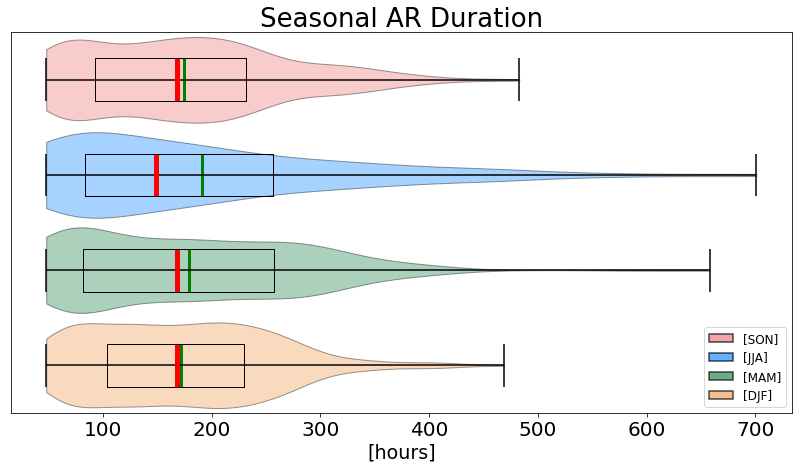

In [77]:
#plot the box plot
from matplotlib.collections import PolyCollection

ticksize =20
legendsize=19
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [winter_ivt,spring_ivt,summer_ivt,fall_ivt]
type_labels = ['[DJF]', '[MAM]','[JJA]', '[SON]']

# colors = ['#D70844','#CA08D7','#08D74A']

colors = ['sandybrown','seagreen','dodgerblue', 'lightcoral']

# bp=ax.boxplot(data_area, notch=True, patch_artist = True)
# for patch, color in zip(bp['boxes'], colors):
#     patch.set_facecolor(color)

# vp=ax.violinplot(data_area)

vp = ax.violinplot(data_area, showmedians=True, showextrema=True, showmeans=True, widths=0.9,
                   positions=np.arange(len(data_area)), vert= False)

bp=ax.boxplot(data_area,vert= False,positions=np.arange(len(data_area)),showfliers=False, whis=0)
# for patch, color in zip(vp['boxes'], colors):
#     patch.set_facecolor(color)

# Change colors of the violins
for i, pc in enumerate(vp['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(.4)

# # Access the PolyCollection objects directly to modify the spines
# for pc in vp['bodies']:
#     if isinstance(pc, PolyCollection):
#         for path in pc.get_paths():
#             path.vertices[:, 0]  # Ensure we access the vertices of the path
#         pc.set_edgecolor('black')
#         pc.set_linewidth(1.5)



# Change color and linewidth of medians
# for median in vp['cmedians']:
#     median.set_color('red')
#     median.set_linewidth(3)
    
vp['cmedians'].set_color('red')
vp['cmedians'].set_linewidth(5)

vp['cmeans'].set_color('green')
vp['cmeans'].set_linewidth(3)

vp['cbars'].set_color('black')
vp['cbars'].set_linewidth(1.5)

vp['cmins'].set_color('black')
vp['cmins'].set_linewidth(1.5)

vp['cmaxes'].set_color('black')
vp['cmaxes'].set_linewidth(1.5)

for median in bp['medians']: #get rid of overlapping median information 
    median.set(color ='white',
               linewidth = 0)

    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)

# ax.set_yticks(np.arange(len(type_labels)))
# ax.set_yticklabels(type_labels, fontsize=legendsize)
# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])



# Create legend based on proxy artists
legend_patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='black', linewidth=1.5, alpha=0.7) for color in colors]
ax.legend(legend_patches[::-1], type_labels[::-1], loc='lower right', fontsize=12)
    
# ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Seasonal AR Duration', fontsize=titlesize)
ax.set_xlabel('[hours]', fontsize=legendsize)
# plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 1998-2022. Systems are created at hourly resolution', wrap=True)
fig.savefig("/home/disk/orca/csmall3/AR_testing_research/Final_AR_Results/Figures/Duration/Seas_Dur.png", dpi=350, bbox_inches='tight')
plt.show()

In [78]:
from scipy.stats import shapiro
# data_area = [winter_ivt,spring_ivt,summer_ivt,fall_ivt]
stat, p_value = shapiro(winter_ivt)
print(p_value)
stat, p_value = shapiro(spring_ivt)
print(p_value)
stat, p_value = shapiro(summer_ivt)
print(p_value)
stat, p_value = shapiro(fall_ivt)
print(p_value)
#none normal

4.607459658245716e-08
3.93135746179496e-10
7.161248590653591e-13
1.5635519545753596e-08


In [79]:
## try wilcoxon rank sum test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(winter_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(winter_ivt, summer_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(winter_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(spring_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(spring_ivt, summer_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(spring_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(summer_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(summer_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(summer_ivt, fall_ivt, alternative='two-sided')
print(p_value)

stat, p_value = mannwhitneyu(fall_ivt, winter_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(fall_ivt, spring_ivt, alternative='two-sided')
print(p_value)
stat, p_value = mannwhitneyu(fall_ivt, summer_ivt, alternative='two-sided')
print(p_value)

#go through later but a lot of difference

0.8122732664108328
0.7784026762888183
0.9871622639730457
0.8122732664108328
0.9490610937016454
0.8651161149346193
0.7784026762888183
0.9490610937016454
0.8394344999153291
0.9871622639730457
0.8651161149346193
0.8394344999153291
